**Hypothyroidism Prevalence**

Hypothyroidism (underactive thyroid) is a condition in which your thyroid gland doesn't produce enough of certain crucial hormones.

Hypothyroidism may not cause noticeable symptoms in the early stages. Over time, untreated hypothyroidism can cause a number of health problems, such as obesity, joint pain, infertility and heart disease.

 **Research Question**
 
Determining the factors that predispose one to getting hypothyroidism. To do this we will come up with a model that can assist doctors predict whether a patient has hypothyroidism when they input the observed and measured symptoms of the patient into the 

**Metric of Success.**

A model(SVM or random forest) that predicts whether a patient is likely to get hypothyroidism with an accuracy of 99%

**Research Approach**

1. Decision trees
2. SVM

In [1]:
#Loading our libraries for the analysis
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC,LinearSVC

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
#Loading and previewing our dataset.

df= pd.read_csv('hypothyroid.csv')
df.head(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
5,hypothyroid,85,F,f,f,f,f,t,f,f,f,f,f,f,y,138,y,1.10,y,27,y,1.19,y,23,n,?
6,hypothyroid,64,F,f,f,f,t,f,f,f,f,f,f,f,y,7.70,y,1.30,y,54,y,0.86,y,63,n,?
7,hypothyroid,72,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,1.90,y,34,y,1.05,y,32,n,?
8,hypothyroid,20,F,f,f,f,f,t,f,f,f,f,f,f,y,92,n,?,y,39,y,1.21,y,32,n,?
9,hypothyroid,42,F,f,f,f,f,f,f,f,f,f,f,f,y,48,n,?,y,7.60,y,1.02,y,7.50,n,?


In [3]:
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


**Data Exploration**

In [4]:
df.shape

(3163, 26)

Our data is made up of 3,163 rows and 26 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

While the above code indicates that all the columns have all items as objects, visual observation shows that some columns have intergers and float(age, TSH, T3, TT4, T4U, FTI and TBG) there is a need to therefore change the values in the said columns from objects to float.

In [6]:
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

A visual observations from the head and tail shows a number of '?' in some of the columns, running code to check for nulls was expected to show some of the columns have null values. The conclusion is that the data contains nulls but due to the way they are recorded the isnull code won't be able to identify them, there is therefore a need to replace the '?' with a value that the code will identify as null.

In [7]:
df.duplicated().sum()

77

There are 77 duplicate values in our dataset, these are a small number of the overall dataset and dropping is expected not to affect the quality of our dataset.

**Tidying the Data**

Trying to change the data types from object to float requires that the '?' be first converted to a null value that the code identifies. (error observed could not convert string to float: '?')

In [8]:
df = df.replace("?", np.nan)

In [9]:
#Running the isnull to check for null values after the changing '?' to null values that the code can identify.
df.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

It is observed that the data contains a number of null values. 

Two approaches will be used to deal with the columns with null values:

i. Dropping the TBG column (and the TBG_measured) as it has too many null values

ii. Replacing the null values in the remaining columns using fill forward

In [10]:
df = df.drop(['TBG_measured', 'TBG'], axis = 1)

In [11]:
for col in ['age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']:
    df[col] = df[col].ffill()

In [12]:
#changing some columns from objects to float.

df[['age','TSH', 'T3','TT4','T4U', 'FTI']] = df[['age', 'TSH', 'T3','TT4','T4U', 'FTI']].astype(float)

In [13]:
#Checking that the columns have changed from objects to float.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   object 
 1   age                        3163 non-null   float64
 2   sex                        3163 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

In [14]:
#Dropping the 77 null values observed
df.drop_duplicates(inplace=True)

**EDA**

In [15]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3107.000000,3107.000000,3107.000000,3107.000000,3107.000000,3107.000000
mean,51.071452,5.478651,1.954812,109.251658,0.977261,116.148021
std,19.385091,22.637090,0.994041,44.990925,0.225267,61.216681
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,34.000000,0.000000,1.400000,84.000000,0.850000,91.000000
50%,54.000000,0.700000,1.900000,104.000000,0.960000,107.000000
75%,67.000000,2.200000,2.300000,128.000000,1.060000,129.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


The mean age is 51 years, with the youngest age being 1 year and the oldest being 98 years.

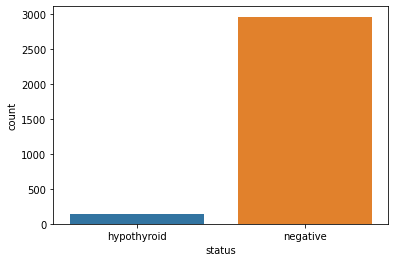

In [16]:
sns.countplot(df['status'])

From the above plot, a higher number of those tested were negative for hypothyroidism

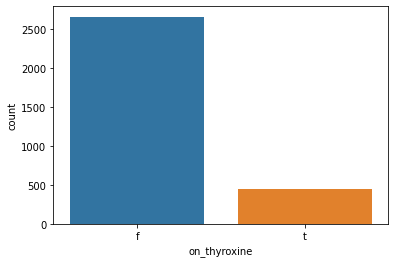

In [17]:
sns.countplot(df['on_thyroxine'])

A higher number of those tested were not on thyroxine drug

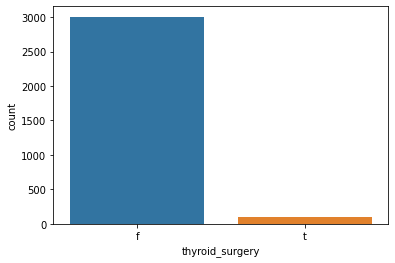

In [18]:
sns.countplot(df['thyroid_surgery'])

A higher number of those tested had not undergone thyroid surgery

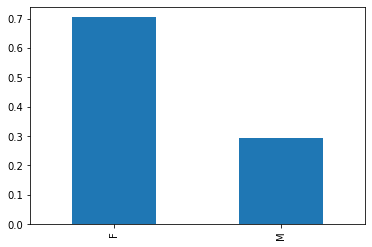

In [19]:
(df['sex'].value_counts()/len(df)).plot.bar()

Female account for around 68% of those tested

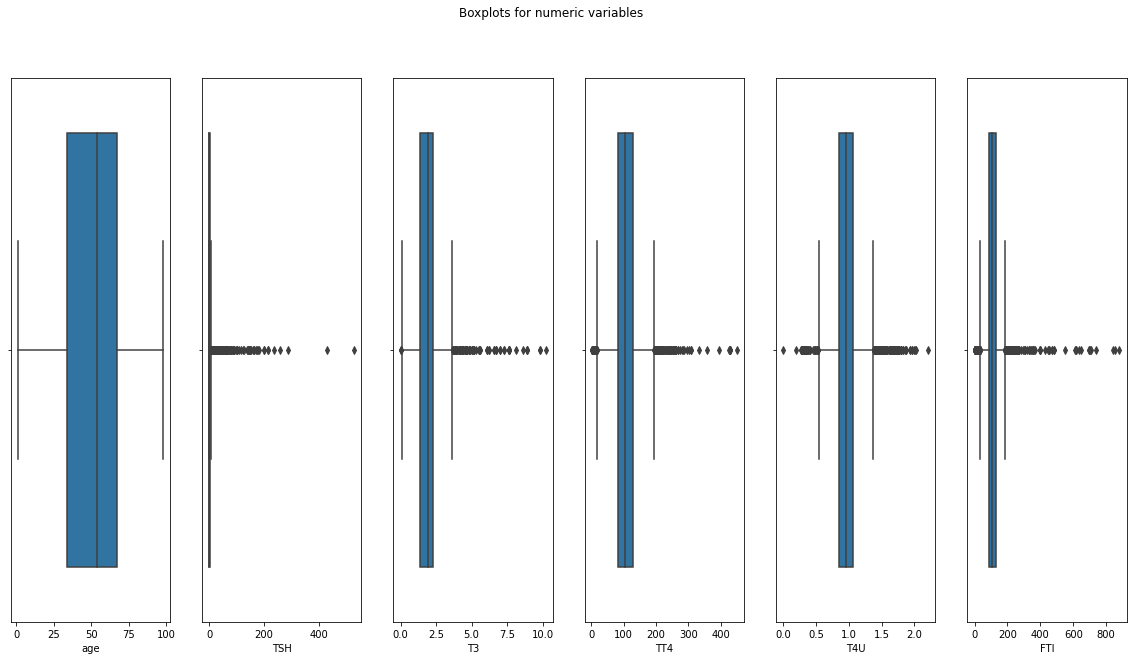

In [20]:
# Checking for outliers on numeric variables
fig, ((ax1, ax2, ax3,ax4,ax5,ax6)) = plt.subplots(1,6, figsize=(20, 10))
fig.suptitle('Boxplots for numeric variables')
sns.boxplot(df['age'], ax=ax1)
sns.boxplot(df['TSH'], ax=ax2)
sns.boxplot(df['T3'], ax=ax3)
sns.boxplot(df['TT4'], ax=ax4)
sns.boxplot(df['T4U'], ax=ax5)
sns.boxplot(df['FTI'], ax=ax6)
plt.show()

There are some outliers observed in TSH, T3, TT4, T4U, FTI and TBG. The dataset being a record of observed medical measurements, the outliers are kept as they are interprated as actual observations which might be crucial in predicting whether an individual is predisposed to thyrodism.

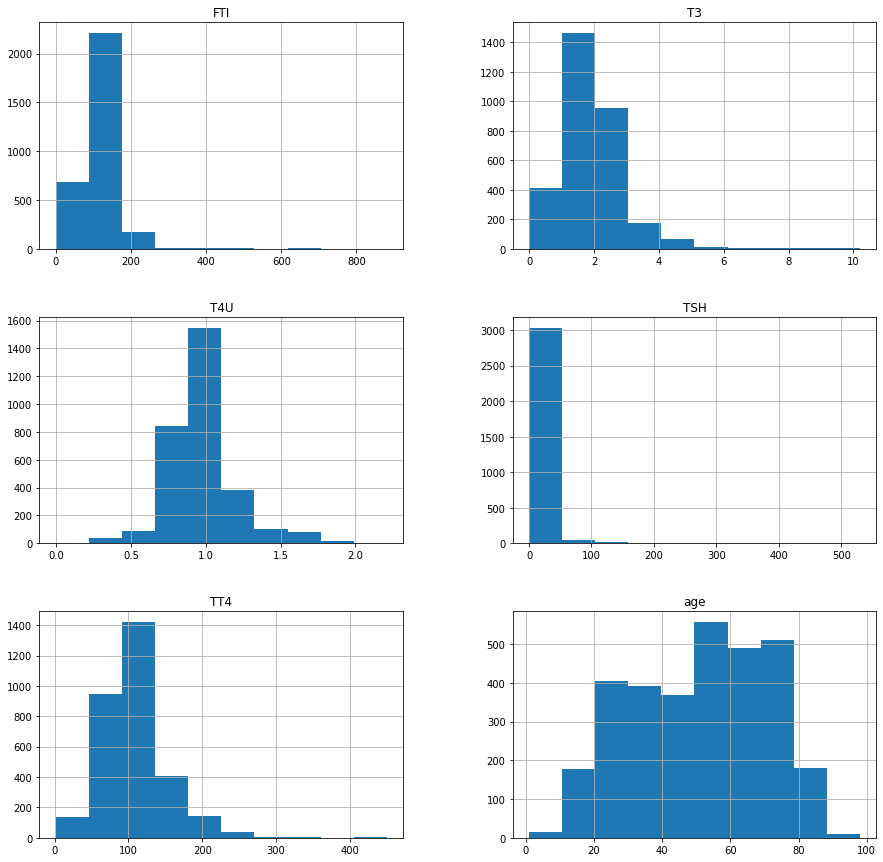

In [21]:
df.hist(bins=10, figsize=(15,15))
plt.show()

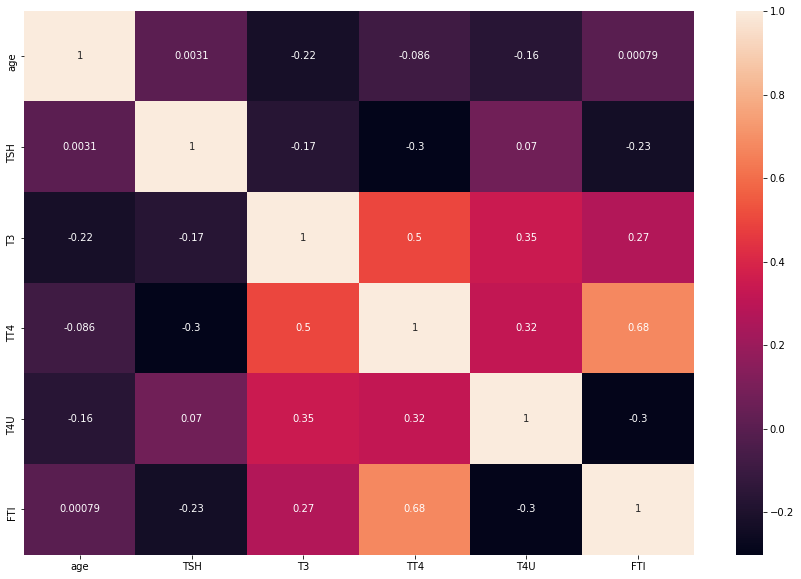

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, ax=ax);


The following measurements are noted to be correlated: TBG and TSH, T3 and age, 

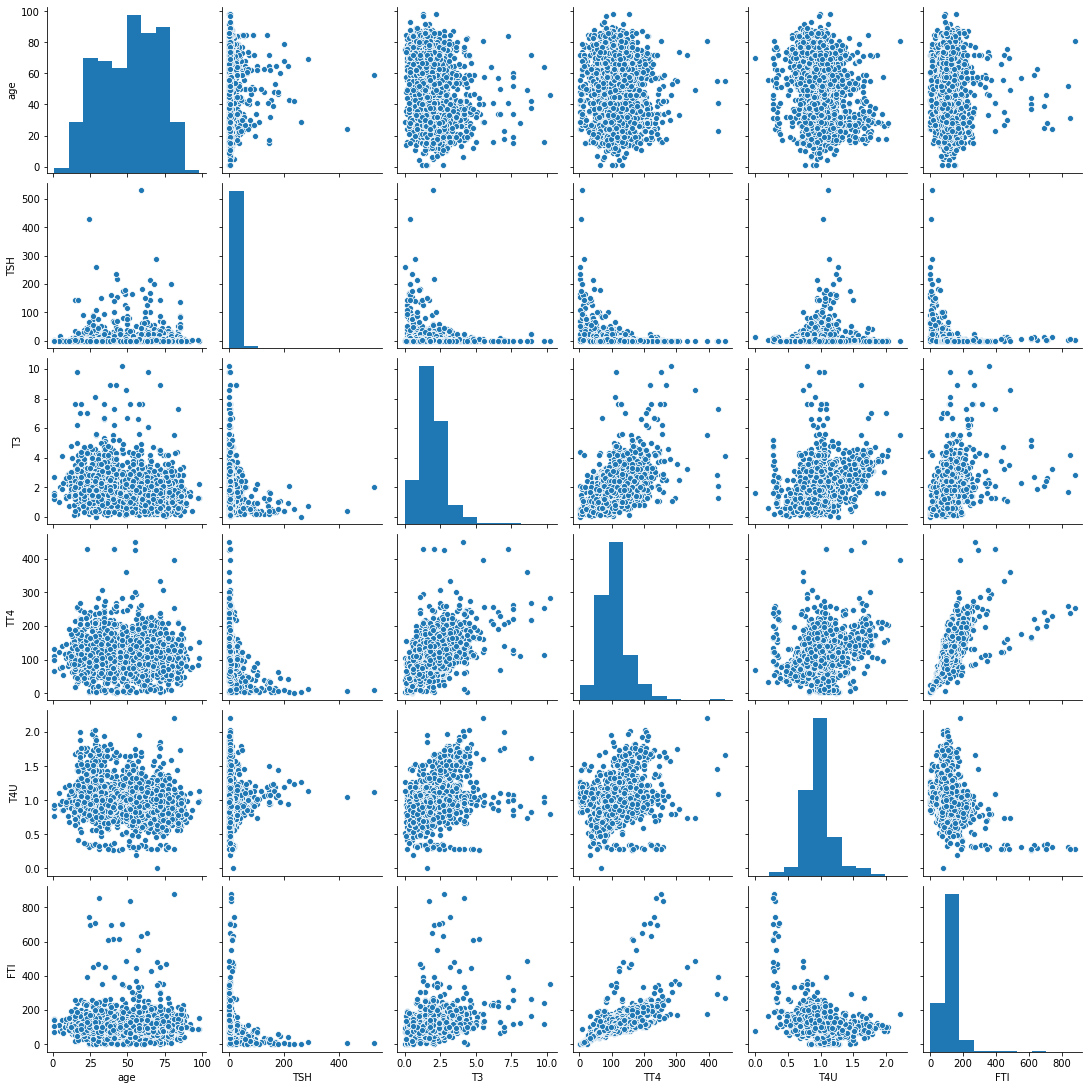

In [23]:
df1 = pd.DataFrame(df, columns= ['age','TSH', 'T3','TT4','T4U', 'FTI'])

sns.pairplot(df1) 
plt.show()

A linear relationship is observed between the following measurements: FTI and TT4, T3 and TT4 and T3 and FTI

**Data preparation for SVM and Decision Tree**

Label encoding the categorical data for use in the analysis.

In [74]:
df = df.apply(LabelEncoder().fit_transform)
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,0,69,1,0,0,0,0,0,0,0,0,0,0,0,1,165,1,7,1,22,1,116,1,19
1,0,12,0,1,0,0,0,0,0,0,0,0,0,0,1,221,1,18,1,26,1,81,1,26
2,0,21,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3,1,5,1,68,1,0
3,0,21,0,0,0,0,0,0,0,0,0,0,0,0,1,237,1,5,1,8,1,72,1,9
4,0,74,1,0,0,0,0,0,0,0,0,0,0,0,1,106,1,13,1,63,1,96,1,48


**Modelling**

Creating a single decision tree as our baseline model

In [75]:
# Split the independent and dependent variables
# We want to predict if someone is a likely to get thyrodism
y = df['status'].values


test_features = df.columns.to_list()
test_features.remove('status')

#Using all features
X = df[test_features].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

tree = DecisionTreeClassifier()
tree = tree.fit(X_train, y_train)


In [76]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.014176150629883026
Mean Squared Error: 0.007157695143968318
Root Mean Squared Error: 0.08460316273029228


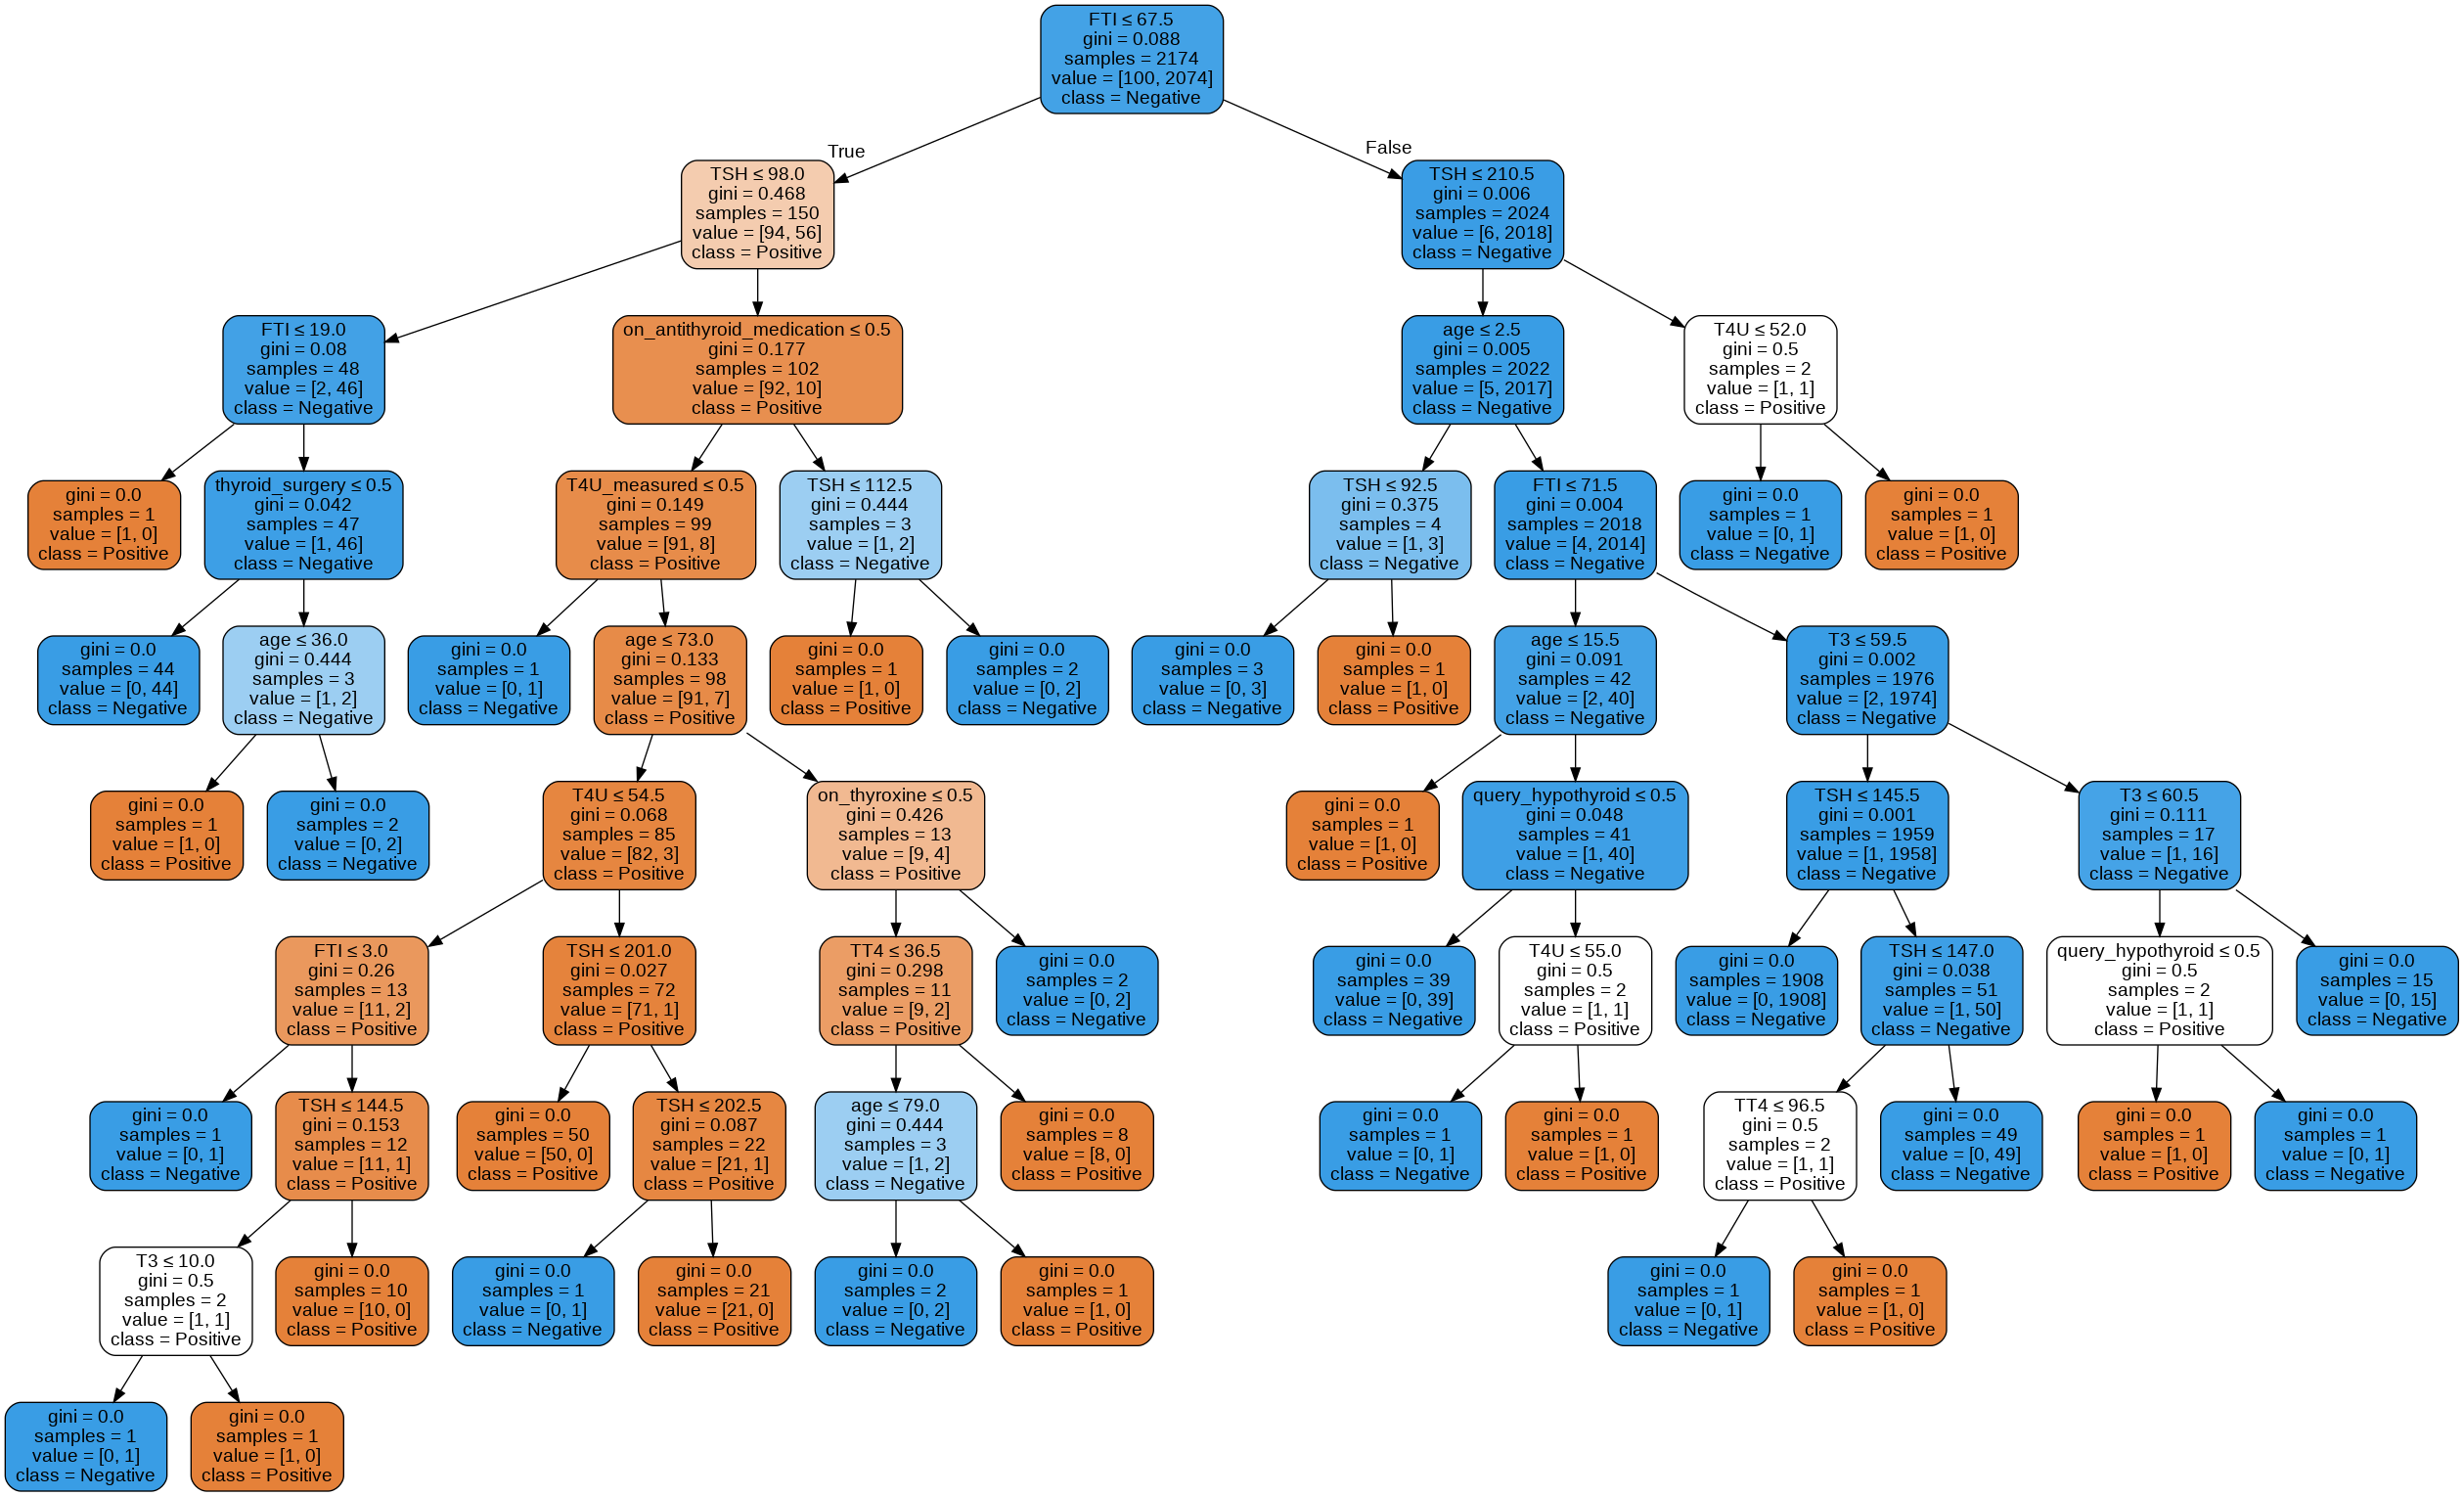

In [27]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['Positive', 'Negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('thyrodism.png')
Image(graph.create_png())

**Random Forest**

In [85]:
# Split the independent and dependent variables
y = df['status'].values


test_features = df.columns.to_list()
test_features.remove('status')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = df[test_features].values
# Train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Import the model



forest = RandomForestRegressor(n_estimators = 300, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,933.000000,933.000000
mean,0.954984,0.953297
std,0.207451,0.192496
min,0.000000,0.014156
25%,1.000000,0.999845
50%,1.000000,0.999845
75%,1.000000,0.999845
max,1.000000,0.999845


In [86]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.013149290334594903
Mean Squared Error: 0.005642266064114821
Root Mean Squared Error: 0.07511501889845214


The RMSE error has reduced compared to what was calculated in the single decision tree, this show that using random forest has improved the model. 

We will find the most important features and see whether using them only will improve the RMSE

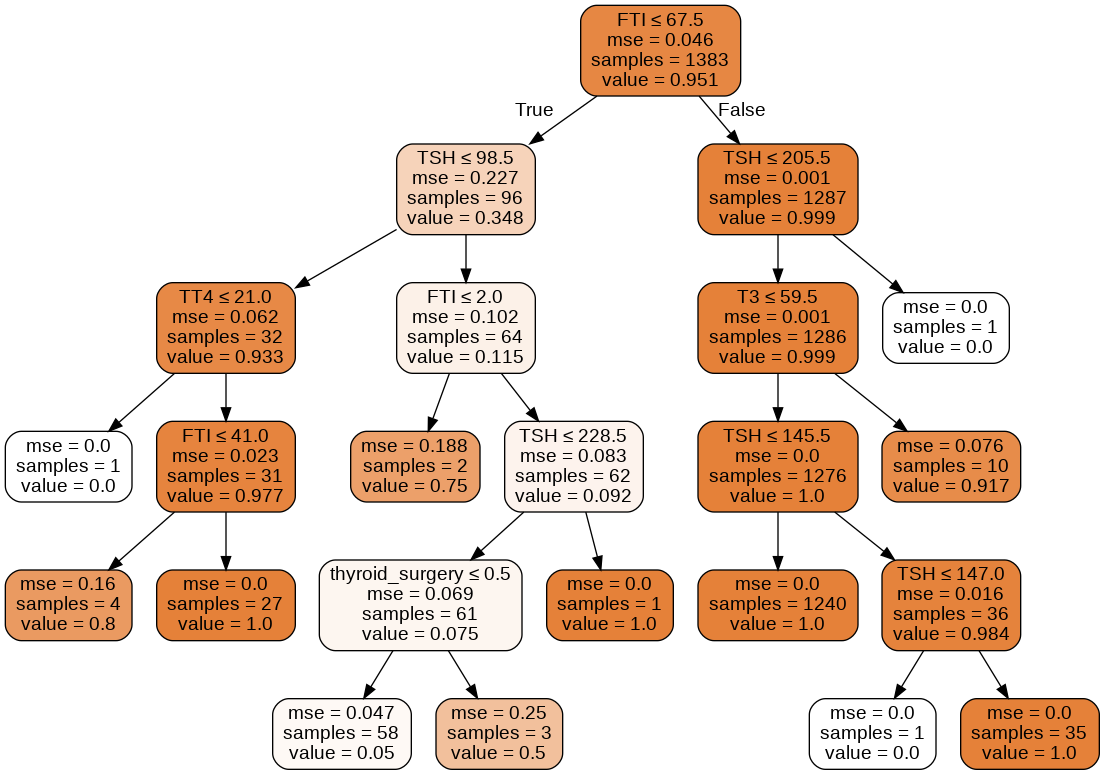

In [84]:
dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[24]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('thyrodism_forest.png')
Image(graph.create_png())

In [66]:
# Get numerical feature importances
importances = list(tree.feature_importances_)


feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances)
print()


feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.05), ('sex', 0.01), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.01), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.01), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.29), ('T3_measured', 0.0), ('T3', 0.01), ('TT4_measured', 0.01), ('TT4', 0.02), ('T4U_measured', 0.0), ('T4U', 0.0), ('FTI_measured', 0.0), ('FTI', 0.6)]

Variable: FTI                  Importance: 0.6
Variable: TSH                  Importance: 0.29
Variable: age                  Importance: 0.05
Variable: TT4                  Importance: 0.02
Variable: sex                  Importance: 0.01
Variable: on_antithyroid_medication Importance: 0.01
Variable: query_hypothyroid    Importance: 0.01
Variable: T3                   Importance: 0.01
Variable: TT4_measured         Importance: 0.01
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importanc

The most important features that determine a patient's likelihood of having thryodism are FTI, TSH,TT4 and whether they have undergone a thyroid surgery.

We shall create a random forest that only uses the important features identified above to see whether the accurracy of the model improves.

In [87]:
y = df['status'].values

test_features = ['TSH','TT4','thyroid_surgery', 'FTI']

X = df[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 300, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,933.000000,933.000000
mean,0.954984,0.952429
std,0.207451,0.195781
min,0.000000,0.011375
25%,1.000000,0.999950
50%,1.000000,0.999950
75%,1.000000,0.999950
max,1.000000,0.999950


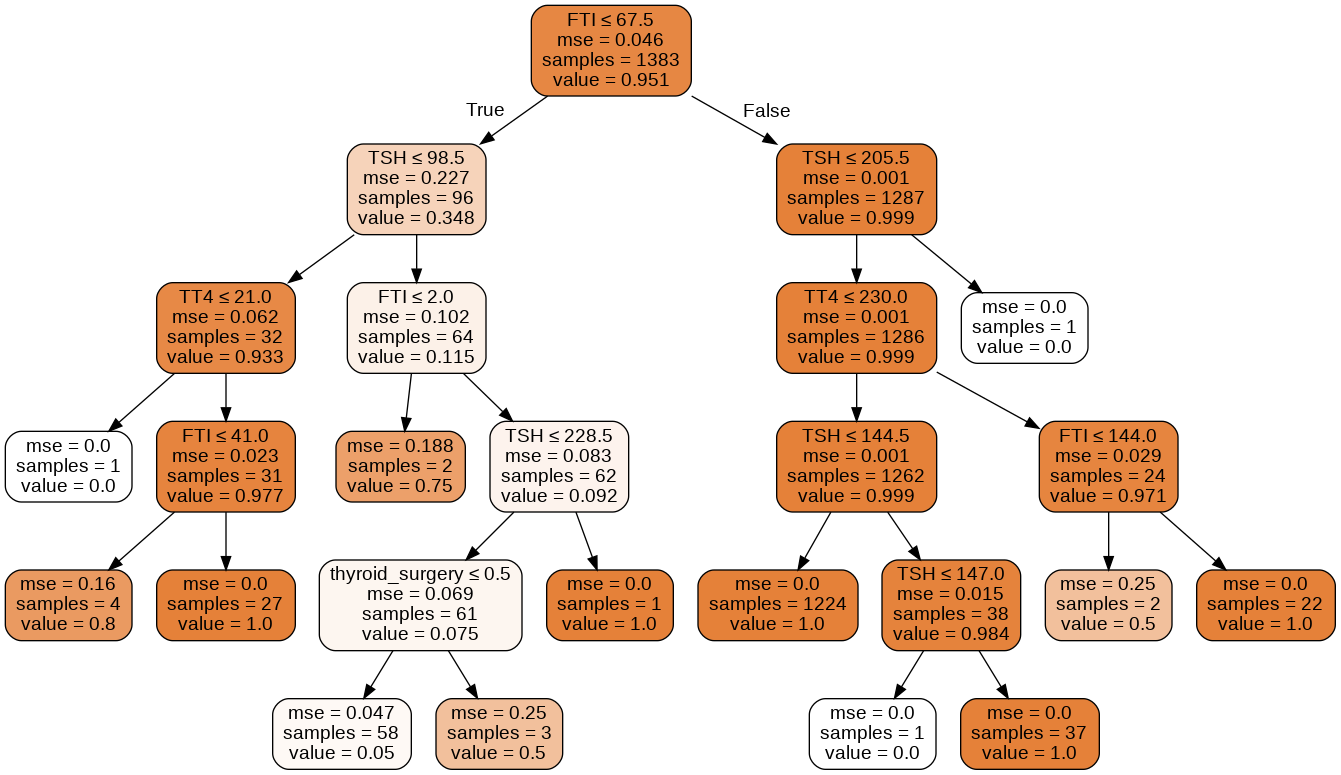

In [89]:
dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[24]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('thyrodism_forest.png')
Image(graph.create_png())

In [90]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.014176150629883026
Mean Squared Error: 0.007157695143968318
Root Mean Squared Error: 0.08460316273029228


**Ada Boost**

In [95]:
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=0)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X)


In [96]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ada))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ada))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada)))

ValueError: ignored

**SVM**

We shall only use two features, FTI and TSH, which were determined to be the most important features using random forest. 

In [44]:
 

 X = df[['FTI', 'TSH']].to_numpy()
 y = df['status']

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_test.shape



(622,)

In [56]:
# Let's now build the svm model 
df_model = SVC(kernel = 'linear')
# Train the model using the training set
df_model.fit(X_train,y_train)

# Predict the response for the test set
y_pred = df_model.predict(X_test)


In [57]:
model_accuracy = accuracy_score(y_test,y_pred)
model_accuracy

0.9828510182207931

In [38]:
df_model = SVC(kernel = 'poly')
# Train the model using the training set
df_model.fit(X_train,y_train)

# Predict the response for the test set
y_pred = df_model.predict(X_test)


In [39]:
model_accuracy = accuracy_score(y_test,y_pred)
model_accuracy

0.9807073954983923

In [40]:
df_model = SVC(kernel = 'rbf')
# Train the model using the training set
df_model.fit(X_train,y_train)

# Predict the response for the test set
y_pred = df_model.predict(X_test)


In [41]:
model_accuracy = accuracy_score(y_test,y_pred)
model_accuracy

0.9790996784565916

In [42]:
# Building the model 
df_model = SVC(kernel='sigmoid')
# Training the model using the training set
df_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
model_accuracy = accuracy_score(y_test,y_pred)
model_accuracy

0.9790996784565916

We implement SVM using 4 kernel functions; linear, polynomial, radial basis function (rbf) and sigmoid. From the above analysis the model that has the highest accuracy is the Linear model with an accuracy of 98.28%
